# Task 2 

In [1]:
# Data
A1 = 16
A2 = 8
B1 = 10
B2 = 8
C1 = 14
C2 = 6
p1 = 10
p2 = 12
cO = 100
x1 = 2.042
x2 = 3.267
x3 = 2.333
x4 = 2.4
x5 = 2.4
x6 = 3.2
x7 = 0.358
x8 = 0

In [2]:
units1 = x1 * A1
units2 = x4 * A2
print(f"Units to produce of product 1: {units1}")
print(f"Units to produce of product 2: {units2}")

Units to produce of product 1: 32.672
Units to produce of product 2: 19.2


#### a) 

In [3]:
from pert import PERT
import scipy
from scipy.integrate import quad
import math
import numpy as np
from IPython.display import Image

In [4]:
def exp_var_PERT(mu, u):
    L = 0.8*mu
    M = mu
    H = 1.1*mu
    pert = PERT(L, M, H)
    fX = lambda x: pert.pdf(x)
    g = lambda x: u/x
    fun_exp = lambda x: g(x)*fX(x)
    exp, err = quad(fun_exp, L, H)
    fun_var = lambda x: (g(x)-exp)**2*fX(x)
    var, err_var = quad(fun_var, L, H)
    return exp, var

Testing with u = 1 and mu = 1 yields:

In [5]:
exp, var = exp_var_PERT(1, 1)
print(f"E(g(X)) = {exp:.5f}")
print(f"Var(g(X)) = {var:.5f}")

E(g(X)) = 1.02024
Var(g(X)) = 0.00345


#### b) 

In [6]:
def exp_var_PERT_MCS(mu, u, num):
    L = 0.8 * mu
    H = 1.1*mu
    M = mu
    alpha = 1 + 4*(M - L)/(H-L)
    beta = 1 + 4*(H - M)/(H-L)
    values = u/(L + np.random.beta(alpha, beta, size=10000)*(H-L))
    exp = np.average(values)
    var = np.var(values)
    return exp, var

Testing with u = 1 and mu = 1 yields and 10000 simulations yields:

In [7]:
exp, var = exp_var_PERT_MCS(1, 1, 10000)
print(f"E(g(X)) = {exp:.5f}")
print(f"Var(g(X)) = {var:.5f}")

E(g(X)) = 1.02087
Var(g(X)) = 0.00352


#### c)

![title](TPK5115_semester_task2c.png)

#### d) 

We simply utilize the method described in chapter 4.3, with out network described by out above picture. In the below code, we let TA1 denote the time it takes (expected and variance) to produce u units for product 1 on machine A. Further let TA1F denote the time it takes (expected and variance) to finalize activity A1, given the above paths.

First, we calculate the number of units to produce according to the operations research department.

In [8]:
units1 = x1 * A1
units2 = x4 * A2
print(f"Units to produce of product 1: {units1}")
print(f"Units to produce of product 2: {units2}")

Units to produce of product 1: 32.672
Units to produce of product 2: 19.2


Now, we calculate the expected time for each acitivity.

In [9]:
mus1 = [A1, B1, C1]
mus2 = [A2, B2, C2]
times1 = [(exp_var_PERT(mu, units1)) for mu in mus1]
times2 = [(exp_var_PERT(mu, units2)) for mu in mus2]

Then, we print out the values and apply them to the excel-sheet to account for the virtual nodes by using VarMax and EMax.

In [10]:
LETTERS = ["A", "B", "C"]
for index, val in enumerate(times1):
    exp = val[0]
    var = val[1]
    print(f"T{LETTERS[index]}1:")
    print(f"E = {exp:.5f}")
    print(f"Var = {var:.5f}")
    print('----------------')
    
for index, val in enumerate(times2):
    exp = val[0]
    var = val[1]
    print(f"T{LETTERS[index]}2:")
    print(f"E = {exp:.5f}")
    print(f"Var = {var:.5f}")
    print('----------------')    
    

TA1:
E = 2.08334
Var = 0.01439
----------------
TB1:
E = 3.33334
Var = 0.03683
----------------
TC1:
E = 2.38096
Var = 0.01879
----------------
TA2:
E = 2.44858
Var = 0.01987
----------------
TB2:
E = 2.44858
Var = 0.01987
----------------
TC2:
E = 3.26478
Var = 0.03533
----------------


Now we can insert the values in Excel to get the following result:

![title](TPK5115_semester_task2d.png)

#### e) 

We repeat the same procedure, but this time we use Monte Carlo Simluation to calculate the expected time (that is, we use the exp_var_PERT_MCS function). We choose to run 10000 simulations. Note that if the calculated values deviate from the excel-spreadsheet in this task, it is because the notebook has been rerun (consequently the values may differ since it is a simulation).

In [11]:
num_sim = 10e3
times1 = [(exp_var_PERT_MCS(mu, units1, num_sim)) for mu in mus1]
times2 = [(exp_var_PERT_MCS(mu, units2, num_sim)) for mu in mus2]

In [12]:
for index, val in enumerate(times1):
    exp = val[0]
    var = val[1]
    print(f"T{LETTERS[index]}1:")
    print(f"E = {exp:.5f}")
    print(f"Var = {var:.5f}")
    print('----------------')
    
for index, val in enumerate(times2):
    exp = val[0]
    var = val[1]
    print(f"T{LETTERS[index]}2:")
    print(f"E = {exp:.5f}")
    print(f"Var = {var:.5f}")
    print('----------------')    

TA1:
E = 2.08272
Var = 0.01442
----------------
TB1:
E = 3.33147
Var = 0.03646
----------------
TC1:
E = 2.37912
Var = 0.01874
----------------
TA2:
E = 2.44952
Var = 0.01967
----------------
TB2:
E = 2.44840
Var = 0.02023
----------------
TC2:
E = 3.26282
Var = 0.03526
----------------


The first time the above code was run, the following result was printed (it was saved as a picture):

![title](TPK5115_semester_task2e1.png)

In excel, we get the following result for the MCS:

![title](TPK5115_semester_task2e2.png)

In [13]:
time_SSP = 8.36456
time_MCS = 8.36693
hours_day = 8
overtime_SSP, overtime_MCS = time_SSP - hours_day, time_MCS - hours_day
cost_overtime_SSP = overtime_SSP*cO
cost_overtime_MCS = overtime_MCS*cO
print(f"Overtime SSP = {overtime_SSP:.3f} hours")
print(f"Cost of overtime SSP = {cost_overtime_SSP:.3f}")
print('----------')
print(f"Overtime MCS = {overtime_MCS:.3f} hours")
print(f"Cost of overtime MCS = {cost_overtime_MCS:.3f}")

Overtime SSP = 0.365 hours
Cost of overtime SSP = 36.456
----------
Overtime MCS = 0.367 hours
Cost of overtime MCS = 36.693


#### f) 

To calculate this efficiently, we apply the VarMax and EMax function in python and solve numerically. We assume that the reduction in production p is percentvise similar for P1 and P2, that is, we reduce the production of both products to new_number_units = old_number_units*(1-p)

We let Y = max(X1, X2), and use a monte carlo simulation procedure to find the expected value and variance. As is done in the 'pRisk' excel-sheet, we assume that the input distributions are independent and normally distributed. We control our procedure of finding eMax and VarMax with the excel-function, and see (although not shown), that the provided result is close to equal. They deviate since they are both numerical.

In [14]:
from numpy.random import normal

In [15]:
def eMax_VarMax(mu1, var1, mu2, var2, num_sim = 1000, cost_analysis = False):
    sigma1, sigma2 = math.sqrt(var1), math.sqrt(var2)
    X1 = normal(loc = mu1, scale = sigma1, size = num_sim)
    X2 = normal(loc = mu2, scale = sigma2, size = num_sim)
    Y = np.array([max(X1[i], X2[i]) for i in range(len(X1))])
    exp, var = np.average(Y), np.var(Y)
    if cost_analysis:
        costs = [(time - 8)*cO if time > 8 else 0 for time in Y]
        ave_cost = sum(costs)/len(costs)
#         print(ave_cost)
        return exp, var, ave_cost
    return exp, var

In [16]:
ps = np.arange(0, 0.2, 0.01)
n = len(ps)
production_times = np.zeros(n)
overtimes = np.zeros(n)
cost_of_overtimes = np.zeros(n)
revenues = np.zeros(n)
profits = np.zeros(n)
num_units1 = np.zeros(n)
num_units2 = np.zeros(n)
max_profit, index = (0, 0)
for i, p in enumerate(ps):
    # Calculate units produced
    num_u1 = units1*(1-p)
    num_u2 = units2*(1-p)
    num_units1[i] = num_u1
    num_units2[i] = num_u2
    # Calculate revenue
    revenue = num_u1*p1 + num_u2*p2
    revenues[i] = revenue
    # Calculate time to produce units for product 1
    TA1, VarTA1 = exp_var_PERT(A1, num_u1)
    TB1, VarTB1 = exp_var_PERT(B1, num_u1)
    TC1, VarTC1 = exp_var_PERT(C1, num_u1)
    # Calculate time to produce units for product 2
    TA2, VarTA2 = exp_var_PERT(A2, num_u2)
    TB2, VarTB2 = exp_var_PERT(B2, num_u2)
    TC2, VarTC2 = exp_var_PERT(C2, num_u2)
    
    # Calculate finalization times for product 2
    TB2F, VarTB2F = TB2, VarTB2
    TC2F, VarTC2F = TB2F + TC2, VarTB2F + VarTC2
    TA2F, VarTA2F = TC2F + TA2, VarTC2F + VarTA2
    
     # Calculate finalization times for product 1
    TA1F, VarTA1F = TA1, VarTA1
    TV1F, VarTV1F = eMax_VarMax(TA1F, VarTA1F, TB2F, VarTB2F) # V1
    TB1F, VarTB1F = TV1F + TB1, VarTV1F + VarTB1
    TV2F, VarTV2F = eMax_VarMax(TB1F, VarTB1F, TC2F, VarTC2F) # V2
    TC1F, VarTC1F = TV2F + TC1, VarTC2F + VarTC1
    
    # Final stage
    TF, VarF, cost_of_overtime = eMax_VarMax(TC1F, VarTC1F, TA2F, VarTA2F, cost_analysis =True)
    
    production_time = TF
    overtime = production_time - 8 if production_time > 8 else 0
#     cost_of_overtime = overtime * cO 
    profit = revenue - cost_of_overtime
    if profit > max_profit:
        max_profit, index = profit, i
    
    production_times[i] = production_time
    overtimes[i] = overtime
    cost_of_overtimes[i] = cost_of_overtime
    profits[i] = profit

In [17]:
print(f"Optimal percentage p = {ps[index]*100} %")
print(f"Units produced of product 1 = {num_units1[index]}")
print(f"Units produced of product 2 = {num_units2[index]}")
print(f"Cost of overtime = {cost_of_overtimes[index]}")
print(f"Revenue = {revenues[index]}")
print(f"Profit = {profits[index]}")
print(f"Average production time = {production_times[index]}")

Optimal percentage p = 3.0 %
Units produced of product 1 = 31.691839999999996
Units produced of product 2 = 18.624
Cost of overtime = 15.295621508059243
Revenue = 540.4064
Profit = 525.1107784919407
Average production time = 8.112124599774035


We can plot the results to visualize

[]

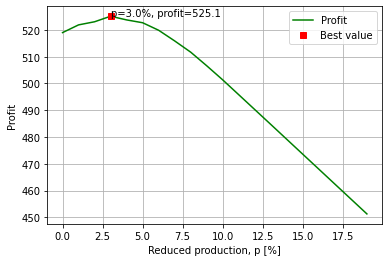

In [18]:
import matplotlib.pyplot as plt
# plt.plot(ps*100, production_times, 'b', label = 'Production times')
plt.plot(ps*100, profits, 'g', label = 'Profit')
plt.plot(ps[index]*100, profits[index], 'rs', label = 'Best value')
plt.text(ps[index]*100, profits[index], f"p={ps[index]*100:.1f}%, profit={profits[index]:.1f}")
plt.grid()
plt.legend()
plt.xlabel('Reduced production, p [%]')
plt.ylabel('Profit')
plt.plot()

[]

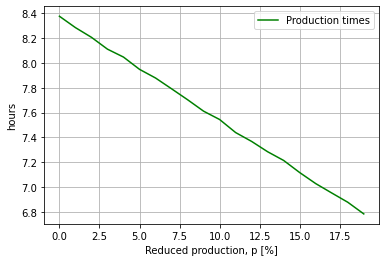

In [19]:
import matplotlib.pyplot as plt
# plt.plot(ps*100, production_times, 'b', label = 'Production times')
plt.plot(ps*100, production_times, 'g', label = 'Production times')
plt.grid()
plt.legend()
plt.xlabel('Reduced production, p [%]')
plt.ylabel('hours')
plt.plot()

[]

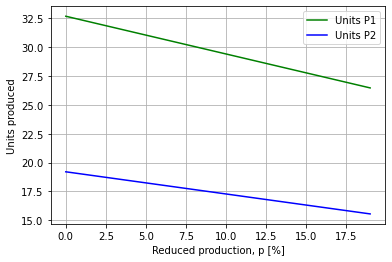

In [20]:
plt.plot(ps*100, num_units1, 'g', label = 'Units P1')
plt.plot(ps*100, num_units2, 'b', label = 'Units P2')
plt.grid()
plt.legend()
plt.xlabel('Reduced production, p [%]')
plt.ylabel('Units produced')
plt.plot()